In [1]:
import torch

In [2]:
x = torch.rand(5 ,3)
x

tensor([[0.4565, 0.3253, 0.8390],
        [0.1450, 0.0500, 0.2506],
        [0.8242, 0.2377, 0.1732],
        [0.5069, 0.7434, 0.5436],
        [0.6755, 0.9523, 0.8731]])

In [3]:
x.size()

torch.Size([5, 3])

In [4]:
x.requires_grad_(True)

tensor([[0.4565, 0.3253, 0.8390],
        [0.1450, 0.0500, 0.2506],
        [0.8242, 0.2377, 0.1732],
        [0.5069, 0.7434, 0.5436],
        [0.6755, 0.9523, 0.8731]], requires_grad=True)

In [5]:
x = torch.randn(3, requires_grad=True)
y = x*2
while y.data.norm() < 1000:
    y = y * 2
y

tensor([-270.8618, 1416.1282,  544.3322], grad_fn=<MulBackward0>)

In [6]:
y.data.norm()

tensor(1541.1302)

In [7]:
y.grad_fn

In [8]:
out = x*2
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
out.backward(v)
x.grad

tensor([2.0000e-01, 2.0000e+00, 2.0000e-04])

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [11]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-2.1935e-02, -2.1859e-02,  7.2721e-05,  1.0594e-01,  2.0686e-02,
         -4.8362e-02, -4.9662e-03, -2.5038e-02,  1.3448e-01,  2.5794e-02]],
       grad_fn=<AddmmBackward>)


In [12]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [13]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.4713, grad_fn=<MseLossBackward>)


In [14]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [15]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([-0.0323, -0.0155,  0.0432,  0.0103, -0.0028, -0.0145])
conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0118,  0.0056, -0.0076,  0.0005, -0.0003,  0.0133])


In [16]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [17]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


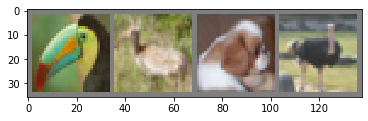

 bird  deer   dog  bird


In [20]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1, 2, 0)))
    plt.show()
    

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
       
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5) 
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x) 
        return x
       
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(3):
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0): 
        # get the inputs 
        inputs, labels = data 
        # zero the parameter gradients 
        optimizer.zero_grad() 
        # forward + backward + optimize 
        outputs = net(inputs) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
        # print statistics 
        running_loss += loss.item()
        if i % 2000 == 1999: 
            # print every 2000 mini-batches 
            print('[%d, %5d] loss: %.5f' % (epoch + 1, i + 1, running_loss / 2000)) 
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.25632
[1,  4000] loss: 1.89393
[1,  6000] loss: 1.69369
[1,  8000] loss: 1.57291
[1, 10000] loss: 1.52186
[1, 12000] loss: 1.46420
[2,  2000] loss: 1.37965
[2,  4000] loss: 1.37140
[2,  6000] loss: 1.32827
[2,  8000] loss: 1.30984
[2, 10000] loss: 1.28526
[2, 12000] loss: 1.25182
[3,  2000] loss: 1.19854
[3,  4000] loss: 1.20139
[3,  6000] loss: 1.18470
[3,  8000] loss: 1.17958
[3, 10000] loss: 1.18928
[3, 12000] loss: 1.16599
Finished Training


In [24]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

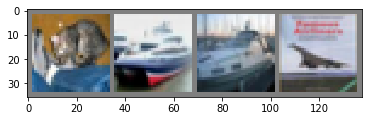

GroundTruth:    cat   ship   ship  plane


In [25]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%6s' % classes[labels[j]] for j in range(4)))

Let's what is the outputs.

In [26]:
outputs = net(images)
outputs

tensor([[-0.3771, -2.2113, -0.8249,  3.7081, -0.9343,  2.4733,  1.4953, -1.1145,
         -0.3594, -1.3586],
        [ 3.0017,  5.2473, -2.1904, -1.6475, -3.5839, -3.2580, -2.5055, -5.0957,
          6.3493,  2.4776],
        [ 1.6101,  0.4160, -0.0489,  0.2138, -0.4217, -1.1474, -1.4641, -1.5458,
          2.0883,  0.0373],
        [ 1.3044,  0.1589,  0.4070, -0.2563,  0.5962, -0.9157, -0.6351, -1.3078,
          1.4758, -0.5328]], grad_fn=<AddmmBackward>)

In [27]:
_, predicted = torch.max(outputs, 1)
print(_)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

tensor([3.7081, 6.3493, 2.0883, 1.4758], grad_fn=<MaxBackward0>)
Predicted:    cat  ship  ship  ship


In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [31]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 46 %
Accuracy of   car : 72 %
Accuracy of  bird : 31 %
Accuracy of   cat : 48 %
Accuracy of  deer : 64 %
Accuracy of   dog : 43 %
Accuracy of  frog : 72 %
Accuracy of horse : 70 %
Accuracy of  ship : 65 %
Accuracy of truck : 68 %


<p style="color:green">I feel very nice!These take me almost a day to complete.</p>